In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
Training_dict = {}
Testing_dict = {}

for file in sorted(os.listdir(r"/Users/matthewweiner/Downloads/dataset/test/data")):
     Testing_dict[file] = pd.read_csv(r"/Users/matthewweiner/Downloads/dataset/test/data/" + file, header = 0, sep = ',', nrows=100)
    
    
for file in sorted(os.listdir(r"/Users/matthewweiner/Downloads/dataset/train/data")):
    Training_dict[file] = pd.read_csv(r"/Users/matthewweiner/Downloads/dataset/train/data/" + file, header = 0, sep = ',', nrows=100)
    
# Read Labels for test set 
test_label = pd.read_excel(r"/Users/matthewweiner/Downloads/dataset/test/labels_spacecraft.xlsx", header = 1)

# Read Labels for training set 
train_label = pd.read_excel(r"/Users/matthewweiner/Downloads/dataset/train/labels.xlsx", header = 1)

training_keys = sorted(os.listdir(r"/Users/matthewweiner/Downloads/dataset/train/data"))
testing_keys = sorted(os.listdir(r"/Users/matthewweiner/Downloads/dataset/test/data"))

answers = pd.read_csv(r"/Users/matthewweiner/Downloads/test data/answer.csv", header = 0, sep = ',', nrows=100)

y_train = []
for index, row in train_label.iterrows():
    if train_label["Unnamed: 2"][index] == "Normal":
        y_train.append(0)
    if train_label["Unnamed: 2"][index] == "Fault":
        y_train.append(0)
    if train_label["BP1"][index] == "Yes":
        y_train.append(1)
    if train_label["BP2"][index] == "Yes":
        y_train.append(2)
    if train_label["BP3"][index] == "Yes":
        y_train.append(3)
    if train_label["BP4"][index] == "Yes":
        y_train.append(4)
    if train_label["BP5"][index] == "Yes":
        y_train.append(5)
    if train_label["BP6"][index] == "Yes":
        y_train.append(6)
    if train_label["BP7"][index] == "Yes":
        y_train.append(7)
    if train_label["BV1"][index] == "Yes":
        y_train.append(8)


y_test = []
for index, row in answers.iterrows():
    if answers["Test condition"][index] == "Normal":
        y_test.append(0)
    if "valve fault" in answers["Test condition"][index]:
        y_test.append(0)
    if answers["Test condition"][index] == "BP1 bubble anomaly":
        y_test.append(1)
    if answers["Test condition"][index] == "BP2 bubble anomaly":
        y_test.append(2)
    if answers["Test condition"][index] == "BP3 bubble anomaly":
        y_test.append(3)
    if answers["Test condition"][index] == "BP4 bubble anomaly":
        y_test.append(4)
    if answers["Test condition"][index] == "BP5 bubble anomaly":
        y_test.append(5)
    if answers["Test condition"][index] == "BP6 bubble anomaly":
        y_test.append(6)
    if answers["Test condition"][index] == "BP7 bubble anomaly":
        y_test.append(7)
    if answers["Test condition"][index] == "Unknown anomaly":
        y_test.append(8)


In [3]:
# Preprocess data
def preprocess_data(data_dict, labels):
    X = []
    for key, value in data_dict.items():
        X.append(value.values)
    X = np.array(X)
    X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)  # Add a channel dimension for Conv1D
    y = np.array(labels)
    return X, y

X_train, y_train = preprocess_data(Training_dict, y_train)
X_test, y_test = preprocess_data(Testing_dict, y_test)

In [4]:
# Filter training data
X_trainV = X_train[y_train != 0]
y_trainV = y_train[y_train != 0]

# Filter testing data
X_testV = X_test[y_test != 0]
y_testV = y_test[y_test != 0]

In [5]:
print(X_trainV.shape)
print(y_trainV.shape)
print(X_testV.shape)
print(y_testV.shape)

(24, 100, 8, 1)
(24,)
(16, 100, 8, 1)
(16,)


In [6]:
# BUBBLE 1

y_train1 = np.where(y_trainV != 1, 0, y_trainV)
y_test1 = np.where(y_testV != 1, 0, y_testV)

import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report
from keras.optimizers import Adam

# Define and compile the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_trainV.shape[1], X_trainV.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Assuming you have 4 classes
custom_optimizer = Adam(lr=0.01)
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_trainV, y_train1, epochs=200, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_testV, y_test1)
print(f'Test accuracy: {test_acc}')

# Make predictions on the test set
predictions = model.predict(X_testV)

# Convert predictions to class labels
y_pred = np.argmax(predictions, axis=1)

# Calculate and print confusion matrix
conf_mat = confusion_matrix(y_test1, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Print classification report
class_report = classification_report(y_test1, y_pred)
print("Classification Report:")
print(class_report)

model.save('CNN_model.h5')

2023-12-01 13:04:12.923800: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/200
1/1 [==============================] - 1s 650ms/step - loss: 0.7464 - accuracy: 0.1579 - val_loss: 0.0227 - val_accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 26ms/step - loss: 0.6205 - accuracy: 0.8421 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 29ms/step - loss: 0.7822 - accuracy: 0.8421 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 29ms/step - loss: 0.7683 - accuracy: 0.8421 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 30ms/step - loss: 0.6787 - accuracy: 0.8421 - val_loss: 0.0357 - val_accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 30ms/step - loss: 0.5549 - accuracy: 0.8421 - val_loss: 0.0984 - val_accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 30ms/step - loss: 0.4513 - accuracy: 0.8421 - val_loss: 0.2515 - val_accuracy: 1.0000
Epoch 8/200
1/1 [==

/Users/matthewweiner/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
# BUBBLE 2

y_train2 = np.where(y_trainV != 2, 0, 1)
y_test2 = np.where(y_testV != 2, 0, 1)

import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report
from keras.optimizers import Adam

# Define and compile the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_trainV.shape[1], X_trainV.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Assuming you have 4 classes
custom_optimizer = Adam(lr=0.01)
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_trainV, y_train2, epochs=200, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_testV, y_test2)
print(f'Test accuracy: {test_acc}')

# Make predictions on the test set
predictions = model.predict(X_testV)

# Convert predictions to class labels
y_pred = np.argmax(predictions, axis=1)

# Calculate and print confusion matrix
conf_mat = confusion_matrix(y_test2, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Print classification report
class_report = classification_report(y_test2, y_pred)
print("Classification Report:")
print(class_report)


Epoch 1/200
1/1 [==============================] - 0s 468ms/step - loss: 1.7272 - accuracy: 0.1579 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 27ms/step - loss: 6.0307 - accuracy: 0.8421 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 27ms/step - loss: 5.0102 - accuracy: 0.8421 - val_loss: 6.9141e-07 - val_accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 27ms/step - loss: 2.1778 - accuracy: 0.8421 - val_loss: 2.7889 - val_accuracy: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 0s 30ms/step - loss: 2.3997 - accuracy: 0.1579 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 29ms/step - loss: 0.7447 - accuracy: 0.8421 - val_loss: 3.3192e-04 - val_accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 30ms/step - loss: 1.2062 - accuracy: 0.8421 - val_loss: 3.6815e-04 - val_accuracy: 1.

In [9]:
# BUBBLE 3

y_train3 = np.where(y_trainV != 3, 0, 1)
y_test3 = np.where(y_testV != 3, 0, 1)

import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report
from keras.optimizers import Adam

# Define and compile the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_trainV.shape[1], X_trainV.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Assuming you have 4 classes
custom_optimizer = Adam(lr=0.01)
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_trainV, y_train3, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_testV, y_test3)
print(f'Test accuracy: {test_acc}')

# Make predictions on the test set
predictions = model.predict(X_testV)

# Convert predictions to class labels
y_pred = np.argmax(predictions, axis=1)

# Calculate and print confusion matrix
conf_mat = confusion_matrix(y_test3, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Print classification report
class_report = classification_report(y_test3, y_pred)
print("Classification Report:")
print(class_report)

Epoch 1/50


/Users/matthewweiner/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 473ms/step - loss: 0.6147 - accuracy: 0.8421 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
1/1 [==============================] - 0s 27ms/step - loss: 8.6332 - accuracy: 0.8421 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 5.8633 - accuracy: 0.8421 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 0s 26ms/step - loss: 2.7062 - accuracy: 0.8421 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 30ms/step - loss: 0.8097 - accuracy: 0.8421 - val_loss: 0.4783 - val_accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 33ms/step - loss: 0.5333 - accuracy: 0.8421 - val_loss: 0.7261 - val_accuracy: 0.2000
Epoch 7/50
1/1 [==============================] - 0s 30ms/step - loss: 0.7077 - accuracy: 0.2632 - val_loss: 0.4065 - val_accuracy: 1.0000
Epoch 8/50
1/1 [=========

In [13]:
# BUBBLE 4

y_train4 = np.where(y_trainV != 4, 0, 1)
y_test4 = np.where(y_testV != 4, 0, 1)

import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report
from keras.optimizers import Adam

# Define and compile the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_trainV.shape[1], X_trainV.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Assuming you have 4 classes
custom_optimizer = Adam(lr=0.01)
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_trainV, y_train4, epochs=200, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_testV, y_test4)
print(f'Test accuracy: {test_acc}')

# Make predictions on the test set
predictions = model.predict(X_testV)

# Convert predictions to class labels
y_pred = np.argmax(predictions, axis=1)

# Calculate and print confusion matrix
conf_mat = confusion_matrix(y_test4, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Print classification report
class_report = classification_report(y_test4, y_pred)
print("Classification Report:")
print(class_report)

Epoch 1/200


/Users/matthewweiner/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 458ms/step - loss: 0.5040 - accuracy: 0.8947 - val_loss: 5.9991 - val_accuracy: 0.8000
Epoch 2/200
1/1 [==============================] - 0s 27ms/step - loss: 3.1574 - accuracy: 0.8947 - val_loss: 4.6259 - val_accuracy: 0.8000
Epoch 3/200
1/1 [==============================] - 0s 27ms/step - loss: 2.4347 - accuracy: 0.8947 - val_loss: 2.5127 - val_accuracy: 0.8000
Epoch 4/200
1/1 [==============================] - 0s 29ms/step - loss: 1.3225 - accuracy: 0.8947 - val_loss: 0.5493 - val_accuracy: 0.8000
Epoch 5/200
1/1 [==============================] - 0s 30ms/step - loss: 0.3300 - accuracy: 0.8947 - val_loss: 3.2236 - val_accuracy: 0.2000
Epoch 6/200
1/1 [==============================] - 0s 26ms/step - loss: 3.5883 - accuracy: 0.1053 - val_loss: 1.4589 - val_accuracy: 0.2000
Epoch 7/200
1/1 [==============================] - 0s 27ms/step - loss: 1.6071 - accuracy: 0.1053 - val_loss: 0.6274 - val_accuracy: 0.8000
Epoch 8/200
1/1 [==============

In [14]:
# BUBBLE 5

y_train5 = np.where(y_trainV != 5, 0, 1)
y_test5 = np.where(y_testV != 5, 0, 1)

import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report
from keras.optimizers import Adam

# Define and compile the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_trainV.shape[1], X_trainV.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Assuming you have 4 classes
custom_optimizer = Adam(lr=0.01)
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_trainV, y_train5, epochs=200, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_testV, y_test5)
print(f'Test accuracy: {test_acc}')

# Make predictions on the test set
predictions = model.predict(X_testV)

# Convert predictions to class labels
y_pred = np.argmax(predictions, axis=1)

# Calculate and print confusion matrix
conf_mat = confusion_matrix(y_test5, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Print classification report
class_report = classification_report(y_test5, y_pred)
print("Classification Report:")
print(class_report)

Epoch 1/200


/Users/matthewweiner/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 463ms/step - loss: 0.3432 - accuracy: 0.8947 - val_loss: 8.7231 - val_accuracy: 0.8000
Epoch 2/200
1/1 [==============================] - 0s 26ms/step - loss: 4.5911 - accuracy: 0.8947 - val_loss: 2.5896 - val_accuracy: 0.8000
Epoch 3/200
1/1 [==============================] - 0s 29ms/step - loss: 1.3629 - accuracy: 0.8947 - val_loss: 1.8385 - val_accuracy: 0.2000
Epoch 4/200
1/1 [==============================] - 0s 28ms/step - loss: 2.0429 - accuracy: 0.1053 - val_loss: 0.7427 - val_accuracy: 0.2000
Epoch 5/200
1/1 [==============================] - 0s 27ms/step - loss: 0.7591 - accuracy: 0.1053 - val_loss: 0.5478 - val_accuracy: 0.8000
Epoch 6/200
1/1 [==============================] - 0s 28ms/step - loss: 0.4839 - accuracy: 0.8947 - val_loss: 0.4990 - val_accuracy: 0.8000
Epoch 7/200
1/1 [==============================] - 0s 28ms/step - loss: 0.3619 - accuracy: 0.8947 - val_loss: 0.5542 - val_accuracy: 0.8000
Epoch 8/200
1/1 [==============

In [16]:
# BUBBLE 6

y_train6 = np.where(y_trainV != 6, 0, 1)
y_test6 = np.where(y_testV != 6, 0, 1)

import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report
from keras.optimizers import Adam

# Define and compile the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_trainV.shape[1], X_trainV.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Assuming you have 4 classes
custom_optimizer = Adam(lr=0.01)
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_trainV, y_train6, epochs=200, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_testV, y_test6)
print(f'Test accuracy: {test_acc}')

# Make predictions on the test set
predictions = model.predict(X_testV)

# Convert predictions to class labels
y_pred = np.argmax(predictions, axis=1)

# Calculate and print confusion matrix
conf_mat = confusion_matrix(y_test6, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Print classification report
class_report = classification_report(y_test6, y_pred)
print("Classification Report:")
print(class_report)

Epoch 1/200
1/1 [==============================] - 0s 464ms/step - loss: 0.3611 - accuracy: 0.8947 - val_loss: 12.1173 - val_accuracy: 0.8000
Epoch 2/200
1/1 [==============================] - 0s 27ms/step - loss: 6.3775 - accuracy: 0.8947 - val_loss: 5.2233 - val_accuracy: 0.8000
Epoch 3/200
1/1 [==============================] - 0s 29ms/step - loss: 2.7491 - accuracy: 0.8947 - val_loss: 0.4124 - val_accuracy: 0.8000
Epoch 4/200
1/1 [==============================] - 0s 28ms/step - loss: 0.2629 - accuracy: 0.8947 - val_loss: 3.4317 - val_accuracy: 0.2000
Epoch 5/200
1/1 [==============================] - 0s 29ms/step - loss: 3.8082 - accuracy: 0.1053 - val_loss: 0.8676 - val_accuracy: 0.2000
Epoch 6/200
1/1 [==============================] - 0s 28ms/step - loss: 0.9186 - accuracy: 0.1053 - val_loss: 0.4763 - val_accuracy: 0.8000
Epoch 7/200
1/1 [==============================] - 0s 27ms/step - loss: 0.3283 - accuracy: 0.8947 - val_loss: 0.6254 - val_accuracy: 0.8000
Epoch 8/200
1/1 [=

In [17]:
# BUBBLE 7

y_train7 = np.where(y_trainV != 7, 0, 1)
y_test7 = np.where(y_testV != 7, 0, 1)

import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report
from keras.optimizers import Adam

# Define and compile the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_trainV.shape[1], X_trainV.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Assuming you have 4 classes
custom_optimizer = Adam(lr=0.01)
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_trainV, y_train7, epochs=200, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_testV, y_test7)
print(f'Test accuracy: {test_acc}')

# Make predictions on the test set
predictions = model.predict(X_testV)

# Convert predictions to class labels
y_pred = np.argmax(predictions, axis=1)

# Calculate and print confusion matrix
conf_mat = confusion_matrix(y_test7, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Print classification report
class_report = classification_report(y_test7, y_pred)
print("Classification Report:")
print(class_report)

Epoch 1/200


/Users/matthewweiner/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 470ms/step - loss: 0.6297 - accuracy: 0.8947 - val_loss: 6.8046 - val_accuracy: 0.8000
Epoch 2/200
1/1 [==============================] - 0s 25ms/step - loss: 3.5814 - accuracy: 0.8947 - val_loss: 4.7285 - val_accuracy: 0.8000
Epoch 3/200
1/1 [==============================] - 0s 25ms/step - loss: 2.4887 - accuracy: 0.8947 - val_loss: 2.2976 - val_accuracy: 0.8000
Epoch 4/200
1/1 [==============================] - 0s 26ms/step - loss: 1.2093 - accuracy: 0.8947 - val_loss: 0.5936 - val_accuracy: 0.8000
Epoch 5/200
1/1 [==============================] - 0s 29ms/step - loss: 0.3238 - accuracy: 0.8947 - val_loss: 2.0979 - val_accuracy: 0.2000
Epoch 6/200
1/1 [==============================] - 0s 28ms/step - loss: 2.3242 - accuracy: 0.1053 - val_loss: 0.8527 - val_accuracy: 0.2000
Epoch 7/200
1/1 [==============================] - 0s 28ms/step - loss: 0.8900 - accuracy: 0.1053 - val_loss: 0.5771 - val_accuracy: 0.8000
Epoch 8/200
1/1 [==============

In [18]:
# BUBBLE 7

y_train8 = np.where(y_trainV != 8, 0, 1)
y_test8 = np.where(y_testV != 8, 0, 0)

import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report
from keras.optimizers import Adam

# Define and compile the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_trainV.shape[1], X_trainV.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Assuming you have 4 classes
custom_optimizer = Adam(lr=0.01)
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_trainV, y_train8, epochs=200, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_testV, y_test8)
print(f'Test accuracy: {test_acc}')

# Make predictions on the test set
predictions = model.predict(X_testV)

# Convert predictions to class labels
y_pred = np.argmax(predictions, axis=1)

# Calculate and print confusion matrix
conf_mat = confusion_matrix(y_test8, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Print classification report
class_report = classification_report(y_test8, y_pred)
print("Classification Report:")
print(class_report)

Epoch 1/200


/Users/matthewweiner/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 471ms/step - loss: 1.1029 - accuracy: 0.1053 - val_loss: 8.2863 - val_accuracy: 0.8000
Epoch 2/200
1/1 [==============================] - 0s 27ms/step - loss: 4.3612 - accuracy: 0.8947 - val_loss: 6.3989 - val_accuracy: 0.8000
Epoch 3/200
1/1 [==============================] - 0s 30ms/step - loss: 3.3678 - accuracy: 0.8947 - val_loss: 2.9853 - val_accuracy: 0.8000
Epoch 4/200
1/1 [==============================] - 0s 29ms/step - loss: 1.5712 - accuracy: 0.8947 - val_loss: 0.7184 - val_accuracy: 0.4000
Epoch 5/200
1/1 [==============================] - 0s 27ms/step - loss: 0.7333 - accuracy: 0.2105 - val_loss: 1.1735 - val_accuracy: 0.8000
Epoch 6/200
1/1 [==============================] - 0s 28ms/step - loss: 0.6189 - accuracy: 0.8947 - val_loss: 1.5682 - val_accuracy: 0.8000
Epoch 7/200
1/1 [==============================] - 0s 29ms/step - loss: 0.8255 - accuracy: 0.8947 - val_loss: 1.4368 - val_accuracy: 0.8000
Epoch 8/200
1/1 [==============

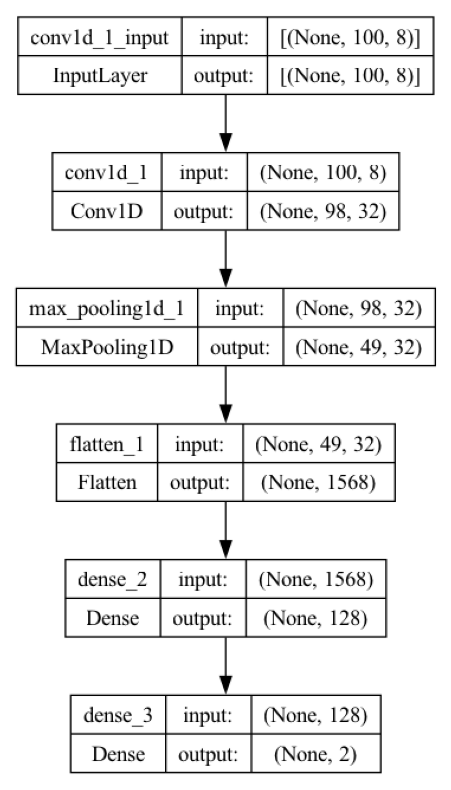

In [15]:
import matplotlib.pyplot as plt
from keras.utils import plot_model

# Save the plot to a file
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Display the plot
img = plt.imread('cnn_model.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
import visualkeras
# Create a figure of the model
visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

TypeError: 'int' object is not iterable